In [10]:
import torch
import torch.nn as nn
from torch import Tensor
def generate_square_subsequent_mask(sz: int) -> Tensor:
        r"""Generate a square mask for the sequence. The masked positions are filled with float('-inf').
            Unmasked positions are filled with float(0.0).
        """
        mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
        return mask


encoder_layer = nn.TransformerEncoderLayer(d_model=128, nhead=8)
transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=2)
# length, batch size, embedding dum
src = torch.rand(16, 2, 128)
src_mask = generate_square_subsequent_mask(16)
out = transformer_encoder(src)
out_masked = transformer_encoder(src, src_mask)

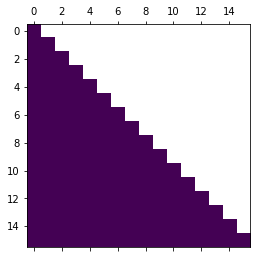

In [12]:
import matplotlib.pyplot as plt

plt.matshow(src_mask)
plt.show()

In [13]:
print(out:)

tensor([[[ 1.3197,  1.5192,  0.8616,  ...,  0.5467, -0.1947,  0.2122],
         [ 2.3112,  0.6707, -0.5595,  ...,  0.7098,  0.8312,  0.9072]],

        [[ 0.0298, -0.3468,  0.9214,  ...,  1.5021, -0.7259,  1.0615],
         [ 0.7634, -0.0137, -1.3852,  ...,  1.3570,  0.5011, -1.1665]],

        [[-0.3618, -0.1059,  1.3987,  ...,  1.4591,  0.0125, -1.2754],
         [ 2.0051, -0.0192, -1.1382,  ..., -0.1725,  0.3706, -0.4230]],

        ...,

        [[-1.3486,  0.5335, -0.0927,  ...,  0.5202,  0.0641,  0.5622],
         [-0.6230,  1.1503,  1.0617,  ...,  1.6362,  1.0495, -0.0668]],

        [[ 1.1680,  0.7469, -0.6248,  ...,  0.6147,  0.4973, -1.0745],
         [ 1.0354,  1.2607, -1.9015,  ...,  1.4713,  1.4670,  0.7649]],

        [[ 0.4313,  0.8702, -0.6074,  ...,  0.8328,  0.6023, -0.5810],
         [ 1.4992, -0.0900,  0.5448,  ...,  2.6976,  0.7763, -1.1586]]],
       grad_fn=<NativeLayerNormBackward>)


In [14]:
print(out_masked)

tensor([[[ 1.0416,  0.9969,  1.3185,  ...,  0.0698, -0.3914,  0.5095],
         [ 0.7854,  0.1001, -0.5771,  ..., -0.0716,  1.2226,  0.3246]],

        [[ 0.1129, -0.7095,  0.9229,  ...,  0.6896, -0.9143,  1.2565],
         [ 0.6219, -0.5527, -1.1725,  ...,  1.0336,  0.7035, -0.1677]],

        [[-0.4289, -0.6625,  1.2154,  ...,  1.1839, -0.0874, -1.6584],
         [ 2.2752,  0.0124, -1.0293,  ..., -0.0282,  0.5003, -0.1759]],

        ...,

        [[-0.5861,  0.6638, -0.2491,  ...,  0.4290, -0.2477,  0.2954],
         [-0.7063,  0.9994,  0.9181,  ...,  1.5375,  1.1531,  0.4486]],

        [[ 1.1423,  1.0215, -0.5632,  ...,  0.5229,  0.3063, -1.0979],
         [ 0.6937,  1.6873, -1.7524,  ...,  1.1509,  1.7782,  0.5213]],

        [[ 0.2677,  1.1247, -0.4927,  ...,  0.9616,  0.8435, -0.4922],
         [-0.2040, -0.3405,  0.2807,  ...,  2.4954,  0.9791, -1.0294]]],
       grad_fn=<NativeLayerNormBackward>)
